Starting Genetic Algorithm...

Generation 0: Best Fitness Value = 7.3176


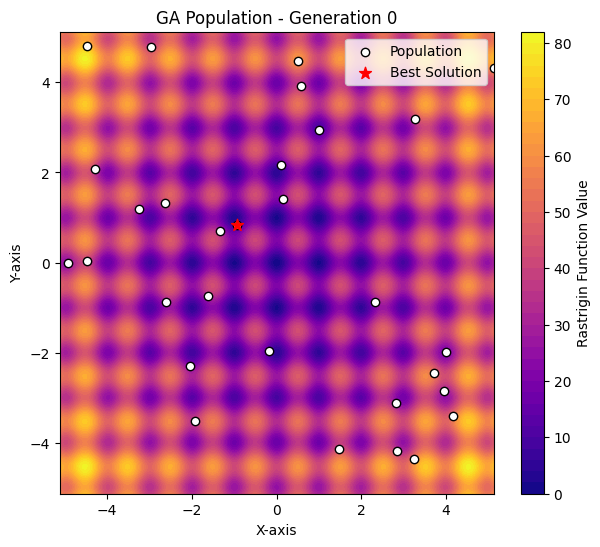

Generation 10: Best Fitness Value = 1.0784


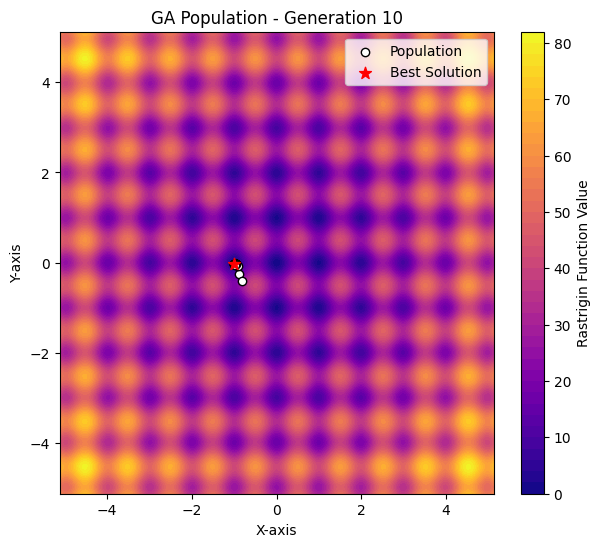

Generation 20: Best Fitness Value = 1.1616


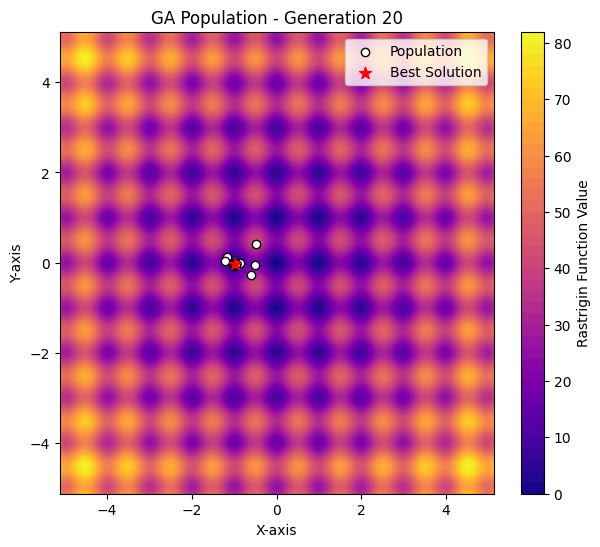

Generation 30: Best Fitness Value = 1.0009


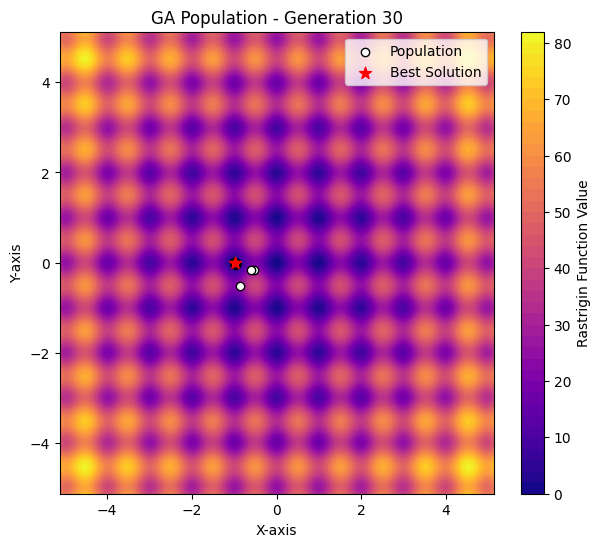

Generation 40: Best Fitness Value = 1.0136


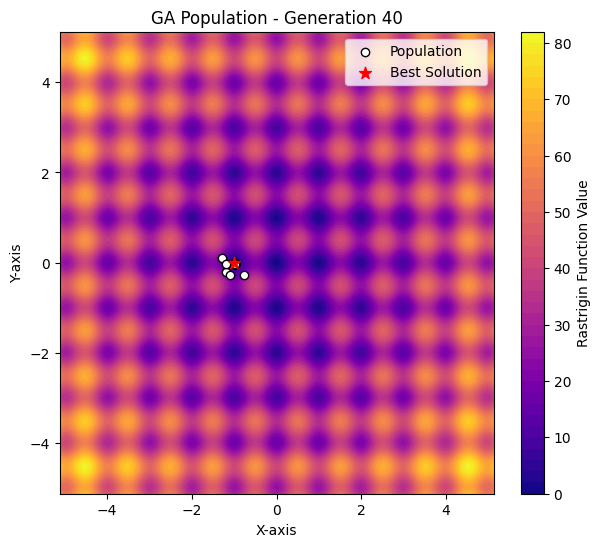

Generation 49: Best Fitness Value = 1.1299


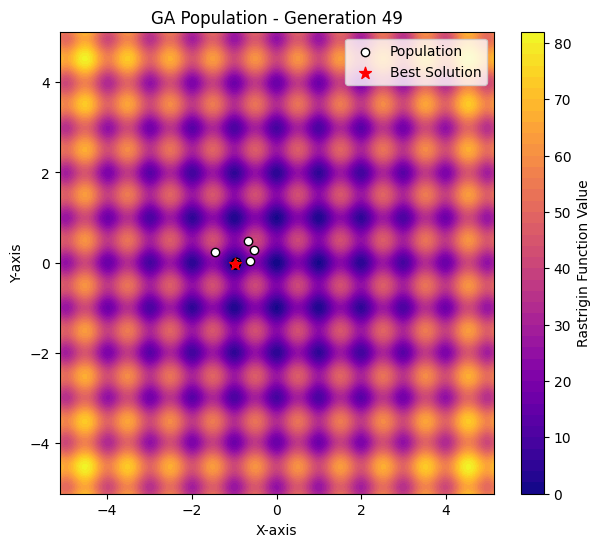


Best Solution Found:
x = -0.9766, y = -0.0132
Rastrigin Value = 1.0961


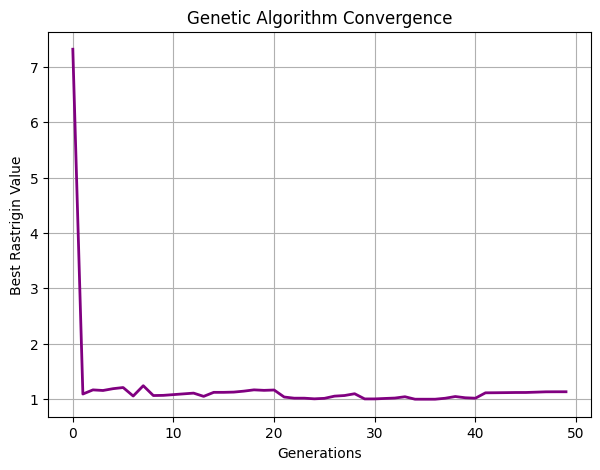

In [ ]:
# ============================================
# LAB 7: Genetic Algorithm - Optimization
# Problem: Minimize Rastrigin Function
# Enhanced with Heatmap Visualization
# ============================================

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Step 1: Define Rastrigin Function
# ------------------------------
def rastrigin(X):
    x, y = X
    return 20 + x**2 + y**2 - 10*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))

# ------------------------------
# Step 2: Initialize Population
# ------------------------------
def initialize_population(pop_size, bounds):
    # Randomly initialize individuals (x, y) within given bounds
    population = np.random.uniform(low=bounds[0], high=bounds[1], size=(pop_size, 2))
    return population

# ------------------------------
# Step 3: Fitness Function
# ------------------------------
def fitness(population):
    # Inverse of Rastrigin value (since we minimize)
    return 1 / (1 + np.array([rastrigin(ind) for ind in population]))

# ------------------------------
# Step 4: Selection (Roulette Wheel)
# ------------------------------
def select_parents(population, fitness_vals):
    probs = fitness_vals / np.sum(fitness_vals)
    selected_idx = np.random.choice(len(population), size=2, replace=False, p=probs)
    return population[selected_idx]

# ------------------------------
# Step 5: Crossover (Blending)
# ------------------------------
def crossover(parent1, parent2):
    alpha = np.random.rand()  # Random blending coefficient
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = alpha * parent2 + (1 - alpha) * parent1
    return child1, child2

# ------------------------------
# Step 6: Mutation
# ------------------------------
def mutate(child, mutation_rate=0.1):
    if np.random.rand() < mutation_rate:
        mutation = np.random.uniform(-0.5, 0.5, size=2)
        child += mutation
    return child

# ------------------------------
# Step 7: Plot Heatmap Function
# ------------------------------
def plot_heatmap(bounds, population=None, best=None, generation=None):
    # Create grid for visualization
    x = np.linspace(bounds[0], bounds[1], 200)
    y = np.linspace(bounds[0], bounds[1], 200)
    X, Y = np.meshgrid(x, y)
    Z = 20 + X**2 + Y**2 - 10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))

    plt.figure(figsize=(7, 6))
    plt.contourf(X, Y, Z, levels=50, cmap='plasma')
    plt.colorbar(label='Rastrigin Function Value')

    # Plot population points
    if population is not None:
        plt.scatter(population[:, 0], population[:, 1], color='white', edgecolors='black', label='Population')

    # Mark best solution
    if best is not None:
        plt.scatter(best[0], best[1], color='red', s=80, marker='*', label='Best Solution')

    plt.title(f"GA Population - Generation {generation}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()

# ------------------------------
# Step 8: Main GA Function
# ------------------------------
def genetic_algorithm(generations=50, pop_size=30, bounds=[-5.12, 5.12]):
    population = initialize_population(pop_size, bounds)
    best_scores = []
    print("Starting Genetic Algorithm...\n")

    for gen in range(generations):
        fitness_vals = fitness(population)
        new_population = []

        # Keep best individual (elitism)
        best_idx = np.argmax(fitness_vals)
        best_individual = population[best_idx]
        best_scores.append(rastrigin(best_individual))

        # Print progress
        if gen % 10 == 0 or gen == generations - 1:
            print(f"Generation {gen}: Best Fitness Value = {rastrigin(best_individual):.4f}")
            # Visualize population movement on heatmap
            plot_heatmap(bounds, population, best_individual, generation=gen)

        # Create new generation
        while len(new_population) < pop_size:
            parent1, parent2 = select_parents(population, fitness_vals)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        population = np.array(new_population[:pop_size])

    # Final best individual
    best_idx = np.argmax(fitness(population))
    best_solution = population[best_idx]
    print("\nBest Solution Found:")
    print(f"x = {best_solution[0]:.4f}, y = {best_solution[1]:.4f}")
    print(f"Rastrigin Value = {rastrigin(best_solution):.4f}")

    # Plot convergence
    plt.figure(figsize=(7,5))
    plt.plot(best_scores, color='purple', linewidth=2)
    plt.title("Genetic Algorithm Convergence")
    plt.xlabel("Generations")
    plt.ylabel("Best Rastrigin Value")
    plt.grid(True)
    plt.show()

# ------------------------------
# Step 9: Run GA
# ------------------------------
genetic_algorithm()